In [1]:
import cvxpy as cp
import numpy as np
import osbdo as ob

(CVXPY) Oct 10 05:59:04 PM: Encountered unexpected exception importing solver SCS:
ImportError('dlopen(/opt/anaconda3/envs/exp_env16/lib/python3.10/site-packages/scs-3.2.0-py3.10-macosx-10.9-x86_64.egg/_scs_direct.cpython-310-darwin.so, 2): Symbol not found: _aligned_alloc\n  Referenced from: /opt/anaconda3/envs/exp_env16/lib/python3.10/site-packages/scs-3.2.0-py3.10-macosx-10.9-x86_64.egg/scs/.dylibs/libgomp.1.dylib (which was built for Mac OS X 10.15)\n  Expected in: /usr/lib/libSystem.B.dylib\n in /opt/anaconda3/envs/exp_env16/lib/python3.10/site-packages/scs-3.2.0-py3.10-macosx-10.9-x86_64.egg/scs/.dylibs/libgomp.1.dylib')


# Create parameters

In [2]:
params = ob.fl_params(num_samples=10000, num_agents=10, size=500)

# Distributed solution with limited memory $m$

In [3]:
agents = ob.fl_agents(params)
g = ob.fl_coupling(agents, params)
prob = ob.Problem(agents = agents, g = g)

In [4]:
max_iter = 100
memory = [20, 50, max_iter]
memory_bounds = {}
for m in memory:
    prob.solve(rel_gap=10**(-10), abs_gap=10**(-10), max_iter=max_iter, memory=m)
    memory_bounds[m] = {'uk':prob.upper_bnd, 'lk':prob.lower_bnd}

k=0, rel_gap=1.6767373885077049e+21, L=4.133904243507362e-18, U=6931.471805599453
k=1, rel_gap=122.47625627535632, L=56.136070323852636, U=6931.471805599453
k=2, rel_gap=44.789433748033886, L=95.76573571772565, U=4385.058810978521
k=3, rel_gap=18.36444020339363, L=148.6495160285245, U=2878.5146643977655
k=4, rel_gap=7.596967150795291, L=226.4973264994324, U=1947.1900756585762
k=5, rel_gap=4.108588793197672, L=272.831399304105, U=1393.7834289173898
k=6, rel_gap=3.118021696583444, L=338.4594670964836, U=1393.7834289173898
k=7, rel_gap=2.009422589821114, L=366.34849060608104, U=1102.4974233768085
k=8, rel_gap=1.5474845424947923, L=432.7788471278083, U=1102.4974233768085
k=9, rel_gap=1.355849103509089, L=462.46349077806667, U=1089.4942001551922
k=10, rel_gap=1.0383106924592487, L=489.74732087025234, U=998.257200733106
k=11, rel_gap=0.8379213309855039, L=543.1446841077984, U=998.257200733106
k=12, rel_gap=0.6927148928941751, L=589.7373532445873, U=998.257200733106
k=13, rel_gap=0.6055943053

k=7, rel_gap=2.009422589821114, L=366.34849060608104, U=1102.4974233768085
k=8, rel_gap=1.5474845424947923, L=432.7788471278083, U=1102.4974233768085
k=9, rel_gap=1.355849103509089, L=462.46349077806667, U=1089.4942001551922
k=10, rel_gap=1.0383106924592487, L=489.74732087025234, U=998.257200733106
k=11, rel_gap=0.8379213309855039, L=543.1446841077984, U=998.257200733106
k=12, rel_gap=0.6927148928941751, L=589.7373532445873, U=998.257200733106
k=13, rel_gap=0.6055943053750626, L=621.736884212426, U=998.257200733106
k=14, rel_gap=0.5075172279354508, L=634.8715938985472, U=957.0798653288991
k=15, rel_gap=0.44240783644185244, L=663.5293022879259, U=957.0798653288991
k=16, rel_gap=0.3995286983175945, L=681.8676733659502, U=954.293377330695
k=17, rel_gap=0.32321017591076956, L=716.7580520050778, U=948.4215480790996
k=18, rel_gap=0.2737949008520824, L=744.563781378517, U=948.4215480790996
k=19, rel_gap=0.1824099446269695, L=772.0785985225673, U=912.913412926737
k=20, rel_gap=0.15461596359708

k=14, rel_gap=0.5075172279354508, L=634.8715938985472, U=957.0798653288991
k=15, rel_gap=0.44240783644185244, L=663.5293022879259, U=957.0798653288991
k=16, rel_gap=0.3995286983175945, L=681.8676733659502, U=954.293377330695
k=17, rel_gap=0.32321017591076956, L=716.7580520050778, U=948.4215480790996
k=18, rel_gap=0.2737949008520824, L=744.563781378517, U=948.4215480790996
k=19, rel_gap=0.1824099446269695, L=772.0785985225673, U=912.913412926737
k=20, rel_gap=0.1546159635970888, L=790.6641183815335, U=912.913412926737
k=21, rel_gap=0.13880566231735833, L=801.6410904289388, U=912.913412926737
k=22, rel_gap=0.1160063068838798, L=818.0181485495184, U=912.913412926737
k=23, rel_gap=0.09268290824415878, L=835.4788072906761, U=912.913412926737
k=24, rel_gap=0.08041017575433915, L=844.9692842714514, U=912.913412926737
k=25, rel_gap=0.07278750588358744, L=850.973196387879, U=912.913412926737
k=26, rel_gap=0.061171948922529695, L=856.8826907215216, U=909.2998749109383
k=27, rel_gap=0.05438132883

# Centralized solution

In [5]:
h_cvx = ob.cvx_federated_learning(params=params)[2]

# Plot

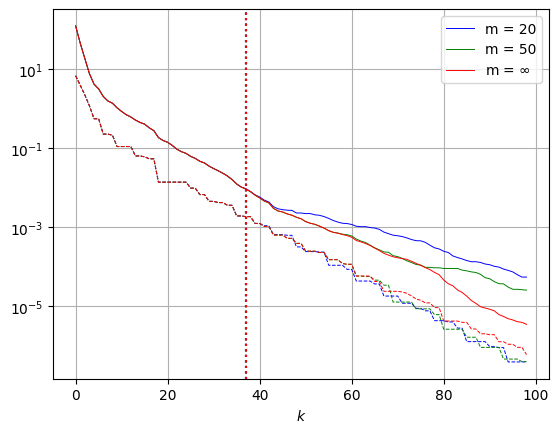

In [6]:
ob.plot_finite_memory(memory_bounds=memory_bounds, memory=memory, h_true=h_cvx)